Подключаем библиотеки

In [471]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

Загружаем данные

In [443]:
dataset = pd.read_csv('for_eda.csv')

In [444]:
dataset.shape

(100000, 12)

In [445]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


PassengerId — идентификатор пассажира

Survival — поле в котором указано спасся человек (1) или нет (0)

Pclass — содержит социально-экономический статус:
1) высокий
2) средний
3) низкий

Name — имя пассажира

Sex — пол пассажира

Age — возраст

SibSp — содержит информацию о количестве родственников 2-го порядка (муж, жена, братья, сетры)

Parch — содержит информацию о количестве родственников на борту 1-го порядка (мать, отец, дети)

Ticket — номер билета

Fare — цена билета

Cabin — каюта

Embarked — порт посадки

C — Cherbourg

Q — Queenstown

S — Southampton

Количество элементов nan в датафрейме.

In [446]:
dataset.isna().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             3292
SibSp              0
Parch              0
Ticket          4623
Fare             134
Cabin          67866
Embarked         250
dtype: int64

Количество пропущенных значений в столбце Cabin значительно, но мы не можем заполнить их значениями основываясь на известных
данных. Хоть пропущенных значений Ticket немного, но обработать мы их так же не можем, по аналогичной ситуации с Cabin. Пропущенные значения Age мы можем обработать. Так как скорее всего значения Age и Fare будут
коррелировать с другими переменными, такими как Pclass (что вполне лоигчно предположить, ведь, чем старе человек, тем скорее
всего он будет состоятельнее и позволет себе более высокий по статусу класс), тогда произведём замену пропущенных значений Age 
и Fare на их средние значения по классам; пропущенным значениям Embarked присвоим порт в котором село больше всего людей:

In [447]:
#Age
dataset.loc[(dataset['Pclass'] == 1) & (dataset['Age'].isna()), 'Age'] = dataset[dataset.Pclass == 1].Age.median()
dataset.loc[(dataset['Pclass'] == 2) & (dataset['Age'].isna()), 'Age'] = dataset[dataset.Pclass == 2].Age.median()
dataset.loc[(dataset['Pclass'] == 3) & (dataset['Age'].isna()), 'Age'] = dataset[dataset.Pclass == 3].Age.median()
#Fare
dataset.loc[(dataset['Pclass'] == 1) & (dataset['Fare'].isna()), 'Fare'] = dataset[dataset.Pclass == 1].Fare.median()
dataset.loc[(dataset['Pclass'] == 2) & (dataset['Fare'].isna()), 'Fare'] = dataset[dataset.Pclass == 2].Fare.median()
dataset.loc[(dataset['Pclass'] == 3) & (dataset['Fare'].isna()), 'Fare'] = dataset[dataset.Pclass == 3].Fare.median()
#Embarked
dataset.loc[dataset['Embarked'].isna(), 'Embarked'] = 'S'

Процент выживших в зависимости от класса (социально-экономичсекий статус):

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

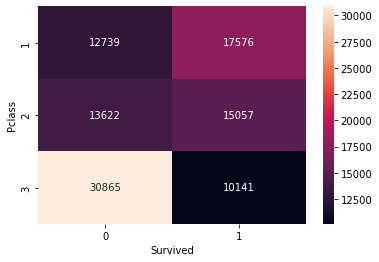

In [448]:
group = dataset.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
sns.heatmap(pclass_survived, annot = True, fmt ="d")

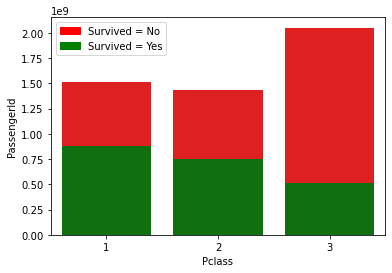

In [475]:
total = dataset.groupby('Pclass')['PassengerId'].sum().reset_index()
bar1 = sns.barplot(x='Pclass',  y='PassengerId', data=total, color='red')
survived = dataset[dataset.Survived==1]
bar2 = sns.barplot(x='Pclass',  y='PassengerId', data=survived, estimator=sum, ci=None,  color='green')
top_bar = mpatches.Patch(color='red', label='Survived = No')
bottom_bar = mpatches.Patch(color='green', label='Survived = Yes')
plt.legend(handles=[top_bar, bottom_bar])
plt.show()

Наглядно видим, что вероятность выжить была выше, при условиию, что пассажир пребывал в более состоятельном классе,
причём разница в проценте выживших между средним и высоким классом была незначительна, в то время как низкий класс представлял значительное различие, то есть вероятность выжить в низком классе была значительно больше, чем в среднем или в высоком.

Проверим, как пол влияет на выживаемость пассажира:

<AxesSubplot:xlabel='Sex'>

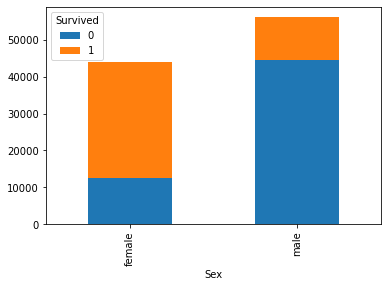

In [449]:
dataset.pivot_table('PassengerId', 'Sex', 'Survived', 'count').plot(kind='bar', stacked=True)
#sns.catplot(x ="Sex", hue ="Survived",
#kind ="count", data = dataset)

Заметим, что выживаемость у пассажиров женского пола значительно выше, чем у мужского.

Сделаем более детальный анализ, добавив в наш график переменную Age:

<AxesSubplot:xlabel='Sex', ylabel='Age'>

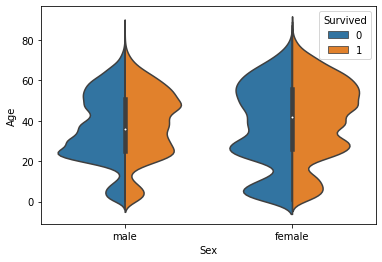

In [496]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = dataset, split = True)

Отметим несколько фактов:

1.С повышением возраста у мужчины увеличивались шансы выжить

2.Среди детей выжило примерно около половины, причём детей женского пола погибло больше

3.Высокий шанс выживания был у женщин в возрасте 25-70 лет


Теперь проанализируем как количество родственников влияло на выживание пассажира:

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


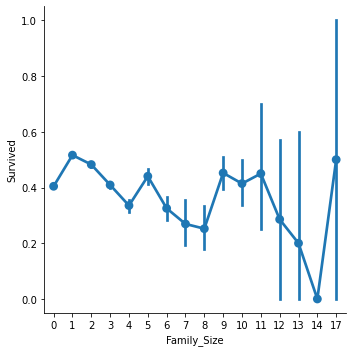

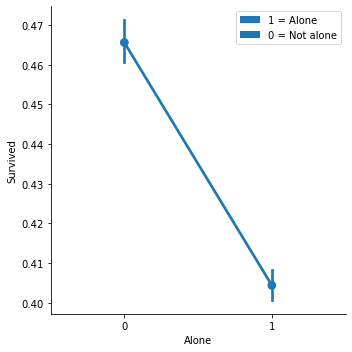

In [510]:
dataset['Family_Size'] = 0
dataset['Family_Size'] = dataset['Parch']+dataset['SibSp']

dataset['Alone'] = 0
dataset.loc[dataset.Family_Size == 0, 'Alone'] = 1

sns.factorplot(x ='Family_Size', y ='Survived', data = dataset)
 
sns.factorplot(x ='Alone', y ='Survived', data = dataset)
top_bar = mpatches.Patch(label='1 = Alone')
bottom_bar = mpatches.Patch(label='0 = Not alone')
plt.legend(handles=[top_bar, bottom_bar])
plt.show()

На первом графике отметим, что количество родственников в значении 6-8 родственников незначительно уменьшало шансы
пассажира выжить, в то время как в значениях от 11 и больше, шансы пассажира выжить значительно уменьшались (учтём, что
пассажиров с 17 родственников было всего двое, поэтому значение 17 можно считать выбросом, ввиду недостаточного количества
пассажиров, для корректного отображения вероятности)
На втором графике отчётливо видно, что одинокие пассажиры имели гораздо  меньше шансов выжить, чем пассажиры с
родственниками.

In [ ]:
dataset.Fare.hist()
#описать

In [ ]:
dataset.Cabin.isna().sum() / 100000
# проанализировать зависимость выживания от известности номера кабины

In [ ]:
temp_df = dataset.pivot_table('PassengerId', ['SibSp'], 'Survived', 'count')
temp_df
# посмотреть для женщин и мужчин отдельно

In [ ]:
dataset.pivot_table('PassengerId', ['SibSp'], 'Survived', 'count').plot(title='SibSp')
dataset.pivot_table('PassengerId', ['Parch'], 'Survived', 'count').plot(title='Parch')

In [ ]:
#процент выживших
dataset[dataset.Survived == 1].Survived.count() / dataset.Survived.count()

Заметим странную, но интересную закономерность, что значительная часть пассажиров, находящихся в одинаковых каютах
в своём большинстве оплачивали цену за билет, существенно отличающуюся  между собой.

In [ ]:
#df = dataset.dropna(axis='index', how='any')
fare_of_cabin = dataset.groupby('Cabin').agg({'Fare':'std'}).dropna().sort_values(by=['Fare'], ascending=False)
fare_of_cabin[fare_of_cabin.Fare > 40].Fare.count() / fare_of_cabin.Fare.count()

Посмотрим на наличие возможных статистических связей между признаками объектов используя матрицу корреляций. Можно сделать предварительные выводы, которые подтверждают мысли высказанные ранее. В частности, что шансы выжить уменьшаются с ростом класса и возраст — очень слабый признак для построения модели. Также можно обнаружить и другие закономерности. Между возрастом и классом существует отрицательная корреляция, что, скорее всего, связано с более возрастные пассажиры чаще могли себе позволить более дорогую каюту. Кроме того, стоимость билета и класс тесно связаны (значительный коэффициент корреляции), что вполне ожидаемо.

In [ ]:
dataset[dataset.Cabin.isnull()]
#dataset

In [ ]:
df = dataset.drop(['PassengerId', 'Cabin', 'Name', 'Sex', 'Ticket', 'Embarked', 'len_of_name'], axis=1)

sns.heatmap(data=df.corr(), annot=True)

In [ ]:
dataset[dataset.Embarked.isnull()].Embarked.shape

In [ ]:
#df['isCabin']

In [ ]:
dataset.groupby('Pclass').agg({'Fare':'median'})

In [ ]:
dataset.groupby('Embarked').agg({'PassengerId':'count'})

Заметим, что у цены билета в независимости от класса очень велико значения разброса:

In [ ]:
# нужен график
#dataset.pivot_table('Fare', 'Pclass', 'Survived', 'max').plot(kind='bar', stacked=True)
print(dataset[dataset.Pclass == 3].Fare.max(), dataset[dataset.Pclass == 3].Fare.min(),
      dataset[dataset.Pclass == 2].Fare.max(), dataset[dataset.Pclass == 2].Fare.min(),
     dataset[dataset.Pclass == 1].Fare.max(), dataset[dataset.Pclass == 1].Fare.min())

In [ ]:
#df = dataset[['']]
dataset['len_of_name'] = dataset.Name.apply(len)
dataset.sort_values(by=['len_of_name'], ascending=False)

In [492]:
#dataset['len_ticket'] = dataset.Ticket.apply(len)
dataset.Ticket.unique

<bound method Series.unique of 0           209245
1            27323
2        CA 457703
3         A. 10866
4           427635
           ...    
99995     PC 15008
99996        13273
99997          NaN
99998       458654
99999       458074
Name: Ticket, Length: 100000, dtype: object>

In [493]:
dataset[(dataset.Pclass == 3) & (dataset.Fare > 600)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6772,6772,1,3,"Brown, Margaret",female,3.0,1,2,9619,610.69,NaN,C
29160,29160,0,3,"Dolphin, Morris",male,53.0,0,0,21529,640.79,NaN,S
46100,46100,1,3,"Uribe, Sandra",female,57.0,0,0,3746073,608.09,D15294,C


Conclusion :  

The columns that can be dropped are: 
PassengerId, Name, Ticket, Cabin: They are strings, cannot be categorized and don’t contribute much to the outcome. 
Age, Fare: Instead, the respective range columns are retained.
The titanic data can be analyzed using many more graph techniques and also more column correlations, than, as described in this article.
Once the EDA is completed, the resultant dataset can be used for predictions.